## Assignment 1 - Classification


## Learning Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [11]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

**Questions (12 marks total)**

Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  ( 3 marks) 

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing: (4 marks)

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification: (5 marks)

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



# 1. Data exploration

In [15]:
### Your code here

## Feel free to use multiple cells  and continue from here:

#df = pd.read_excel("/path/to/file/default of credit card clients.xls", sheet = 0, skiprows= 1, header = 0)

Additional Variable Information

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

SEX: Gender (1 = male; 2 = female).

EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

MARRIAGE: Marital status (1 = married; 2 = single; 3 = others).

AGE: Age (year).

PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT46 = amount of bill statement in April, 2005. 

PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.

## Import data

In [19]:
df = pd.read_excel("default of credit card clients.xls",skiprows= 1, header = 0)

In [20]:
df_explore = df.copy()
print(df_explore.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [23]:
print(df_explore.shape)

(30000, 25)


In [25]:
print(df_explore.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

There are no missing values, the "default payment next month" needs to be renamed, and we must change the type of "SEX", "EDUCATION", and "MARRIAGE" to category.

### Rename the target (dependent) variable and PAY_0 to PAY_1

In [29]:
df_explore.rename(columns={"default payment next month": "default_payment", "PAY_0": "PAY_1"}, inplace=True)

In [31]:
df_explore.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


From the table description, there are 0 values for Marriage which is contrary to the data information given.
Also education has a max of 6 and a Min of 0 which is unexpected.

In [34]:
#sns.countplot(x="default_payment", data=df_explore)
#plt.title("Default vs Non-Default Clients")
#plt.show()
#print(f"Default rate: {df_explore['default_payment'].mean():.2%}")

In [36]:
# change the type of "SEX", "EDUCATION", and "MARRIAGE" to category and put unexpected values as "other".
df_explore["EDUCATION"] = df_explore["EDUCATION"].replace({0: 4, 5: 4, 6: 4})
df_explore["MARRIAGE"] = df_explore["MARRIAGE"].replace({0: 3})
df_explore["EDUCATION"] = df_explore["EDUCATION"].astype("category")
df_explore["MARRIAGE"] = df_explore["MARRIAGE"].astype("category")
df_explore["SEX"] = df_explore["SEX"].astype("category")

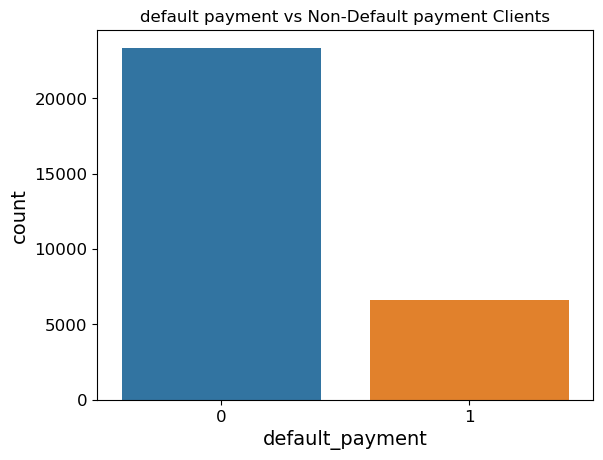

Default rate: 22.12%


In [38]:
# Class distribution of default payment
sns.countplot(x="default_payment", data=df_explore)
plt.title("default payment vs Non-Default payment Clients")
plt.show()
print(f"Default rate: {df_explore['default_payment'].mean():.2%}")

# Categorical Variables

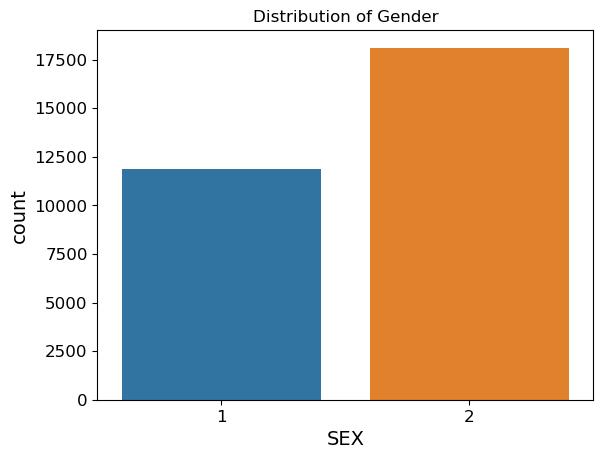

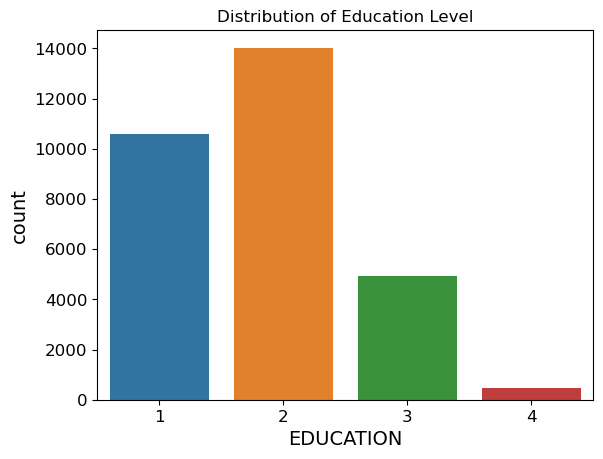

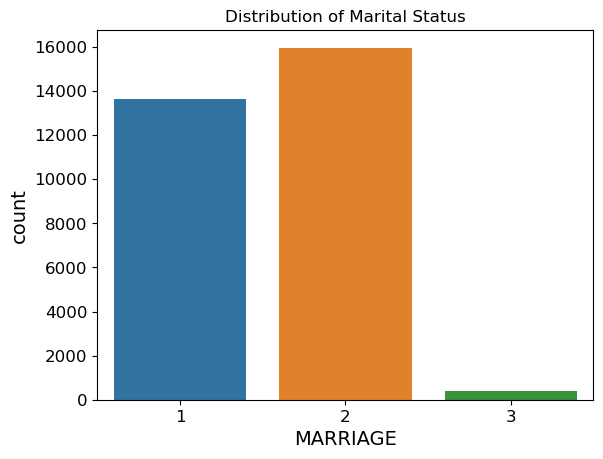

In [41]:
# SEX
sns.countplot(x="SEX", data=df_explore)
plt.title("Distribution of Gender")
plt.show()

# EDUCATION
sns.countplot(x="EDUCATION", data=df_explore)
plt.title("Distribution of Education Level")
plt.show()

# MARRIAGE
sns.countplot(x="MARRIAGE", data=df_explore)
plt.title("Distribution of Marital Status")
plt.show()

# Numerical Variables:

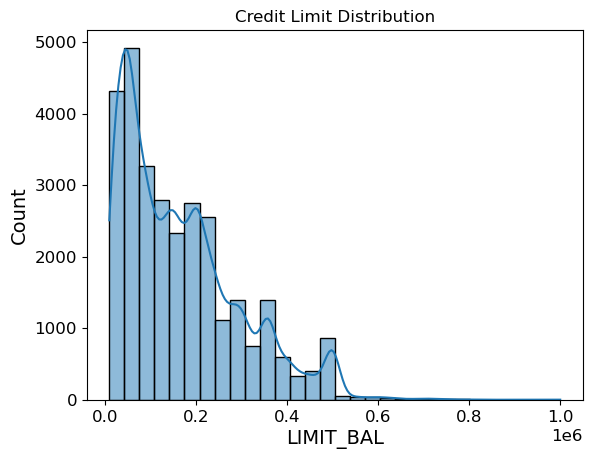

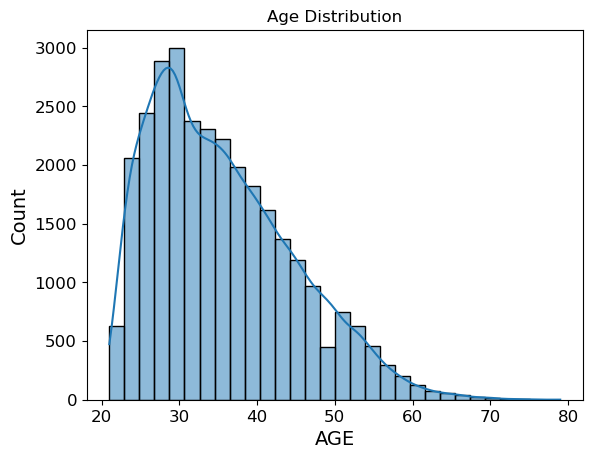

In [44]:
# LIMIT_BAL histogram
sns.histplot(df_explore["LIMIT_BAL"], bins=30, kde=True)
plt.title("Credit Limit Distribution")
plt.show()

# AGE distribution
sns.histplot(df_explore["AGE"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

## Categorical vs Target:

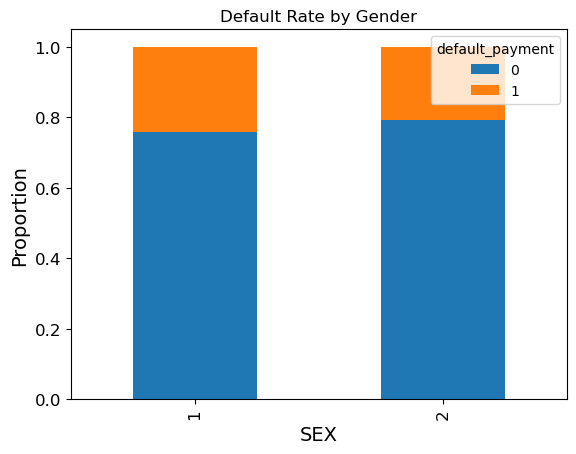

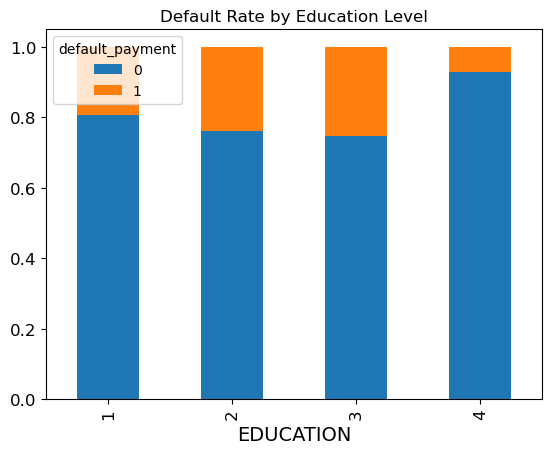

In [47]:
# Default rate by SEX
pd.crosstab(df_explore["SEX"], df_explore["default_payment"], normalize="index").plot(kind="bar", stacked=True)
plt.title("Default Rate by Gender")
plt.ylabel("Proportion")
plt.show()

# Default rate by EDUCATION
pd.crosstab(df_explore["EDUCATION"], df_explore["default_payment"], normalize="index").plot(kind="bar", stacked=True)
plt.title("Default Rate by Education Level")
plt.show()

## Numerical vs Target:

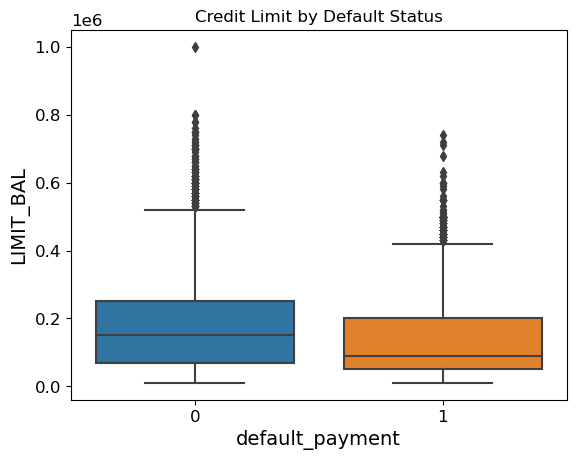

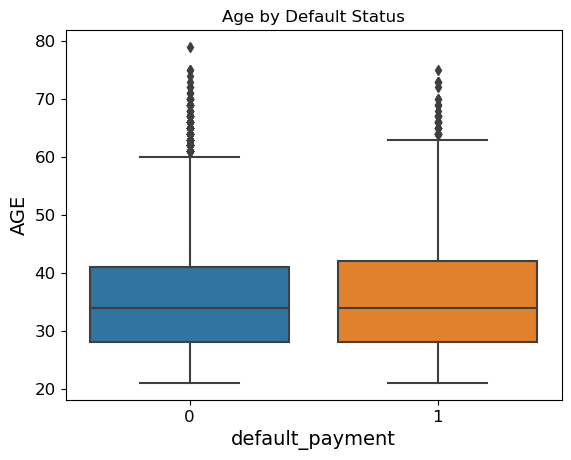

In [50]:
# LIMIT_BAL vs default
sns.boxplot(x="default_payment", y="LIMIT_BAL", data=df_explore)
plt.title("Credit Limit by Default Status")
plt.show()

# AGE vs default
sns.boxplot(x="default_payment", y="AGE", data=df_explore)
plt.title("Age by Default Status")
plt.show()

### Checking for correlation between the numerical variable and the target variable

In [54]:
# Correlation matrix (numerical features) plot
#numerical_cols = ["LIMIT_BAL", "AGE"] + [f"PAY_{i}" for i in range(1, 7)] + [f"BILL_AMT{i}" for i in range(1, 7)]
numerical_cols = ["LIMIT_BAL", "AGE", "PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", 
                  "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

NameError: name 'corr' is not defined

<Figure size 1200x800 with 0 Axes>

## There is a negative correlation between Limit ballance, Bill payment amount and the default payment. A strong positive correlation is seen between default payment and PAY_1 (the repayment status in September, 2005)

C:\Users\frank\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


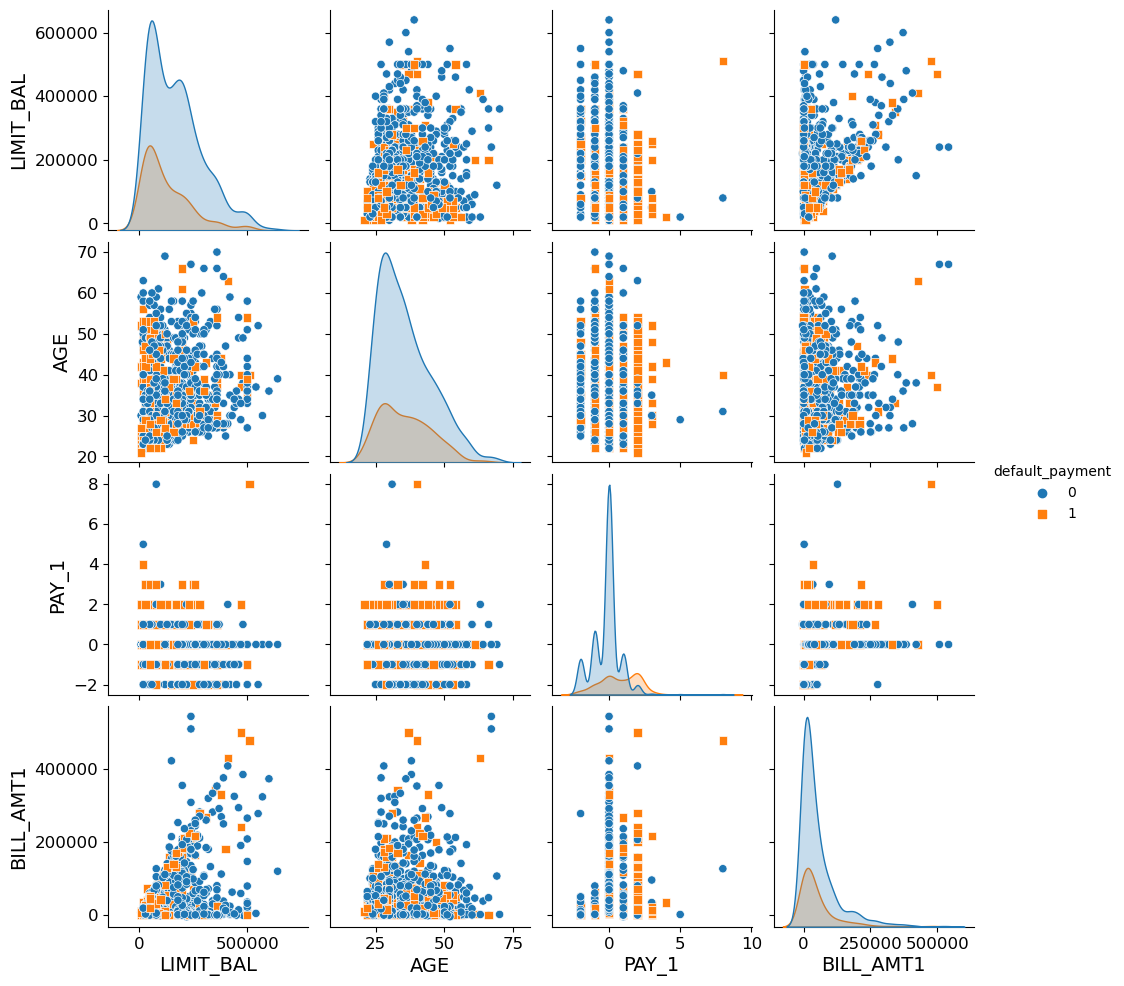

In [57]:
# Sample data for pair plots
sample_df_explore = df_explore.sample(1000)
sns.pairplot(
    sample_df_explore[["LIMIT_BAL", "AGE", "PAY_1", "BILL_AMT1", "default_payment"]],
    hue="default_payment",
    diag_kind="kde",
    markers=["o", "s"]
)
plt.show()

In [59]:
#df_explore.columns = df_explore.columns.str.replace(' ', '_')
#df_explore.columns

# 2. Data Preprocessing

In [62]:
# Sort by dtype
dep_var = ['default_payment']
categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_vars = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [64]:
# Categorical - impute, one hot encode
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_vars)]

num_pipe = Pipeline([
    ("num", ColumnTransformer([
        ("num", "passthrough", numerical_vars)
    ], remainder="drop"))
])
num_transformers = [('num', num_pipe, numerical_vars)]

In [66]:
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
#ct.fit(df_explore[categorical_vars + numerical_vars])
#X = ct.transform(df_explore[categorical_vars + numerical_vars])
# We know from our exploration that the dependent variable 'price' does not have any missing values. 
# It is also generally not necessary to apply transformations to normalize or scale
# the dependent variable.
y = df_explore[dep_var].values

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_explore[categorical_vars + numerical_vars], y, test_size=0.2, random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 23) (6000, 23) (24000, 1) (6000, 1)


In [70]:
#ct.fit(X_train)
x_train = ct.fit_transform(X_train)
x_test = ct.transform(X_test)
y1 = y_train

C:\Users\frank\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# 3. Classification

## a. Random Forest - tune only: n_estimators: {4, 5, 10, 20, 50}.

In [74]:
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.ensemble import RandomForestClassifier as rndf
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
knnc = knnc()
rndfc = rndf(random_state=123)

In [76]:
param_grid_RF = [{'n_estimators':  [4, 5, 10, 20, 50]}]

# we can bump up the max_iterations parameter, otherwise some of our models will fail to converge
#clf = rndf(max_iter=10000, tol=1e-3)
# we pass the model, our parameter grid, and cross-validation parameters to the class
grid_search_RF = GridSearchCV(estimator=rndfc, 
                           param_grid=param_grid_RF,
                           scoring='roc_auc',
                           cv=5)
# last, we fit our data. This will take a while...
grid_search_RF.fit(x_train, np.ravel(y_train))

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid=[{'n_estimators': [4, 5, 10, 20, 50]}],
             scoring='roc_auc')

## The best estimator for Random Forest

In [282]:
# The best parameter estimator
print("Best estimator: ", grid_search_RF.best_params_)

Best estimator:  {'n_estimators': 50}


## Plot ROC curve for best Random Forest

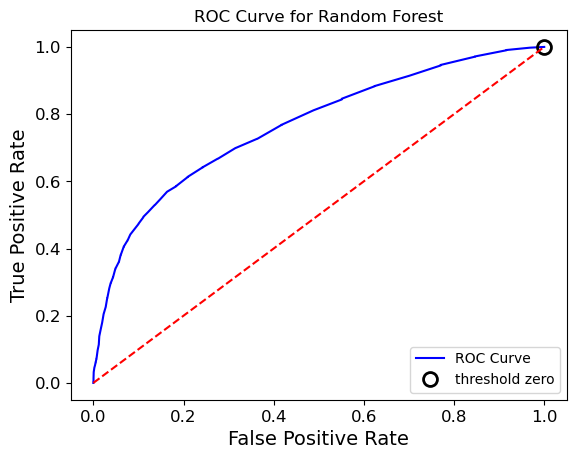

In [285]:
from sklearn.metrics import roc_curve

final_model_RF = grid_search_RF.best_estimator_
#scores = cross_val_predict(final_model, X, y, cv=5, method="predict_proba")

y_pred_proba_RF = final_model_RF.predict_proba(x_test)
#print(roc_auc_score(y_test, y_pred_proba[:,1]))

fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, y_pred_proba_RF[:,1])
plt.plot(fpr_RF, tpr_RF, 'b', label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_RF))
plt.plot(fpr_RF[close_zero], tpr_RF[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.title("ROC Curve for Random Forest")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')

## b. KNN Classfier - tune only: n_neighbors: {3, 5, 10, 20}.

In [78]:
param_grid_knn = [{"n_neighbors":  [3, 5, 10, 20]}]

# we pass the model, our parameter grid, and cross-validation parameters to the class
grid_search_KNN = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid_knn,
                           scoring='roc_auc',
                           cv=5)
# last, we fit our data. This will take a while...
grid_search_KNN.fit(x_train, y_train)

C:\Users\frank\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\frank\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\frank\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\frank\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 10, 20]}], scoring='roc_auc')

In [381]:
# The best parameter estimator for KNN
print(grid_search_KNN.best_params_)

{'n_neighbors': 20}


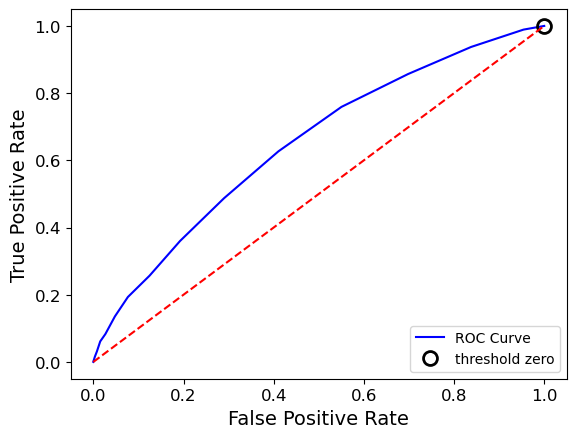

In [391]:
#from sklearn.metrics import roc_curve

final_model_KNN = grid_search_KNN.best_estimator_
#scores = cross_val_predict(final_model, X, y, cv=5, method="predict_proba")

y_pred_proba_KNN = final_model_KNN.predict_proba(x_test)
#print(roc_auc_score(y_test, y_pred_proba[:,1]))

fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_proba_KNN[:,1])
plt.plot(fpr_KNN, tpr_KNN, 'b', label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds_KNN))
plt.plot(fpr_KNN[close_zero], tpr_KNN[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')

#### Conclusions 
(3 marks)

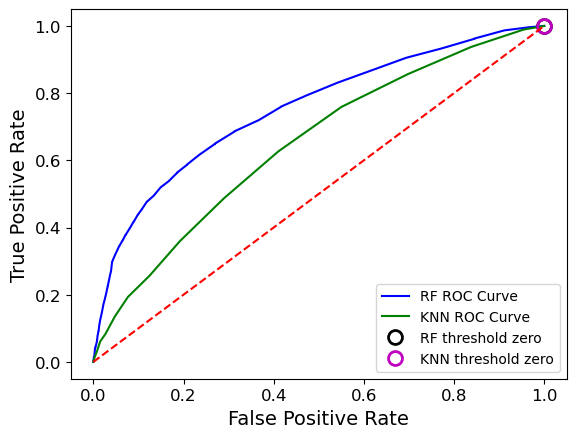

In [395]:


final_model_RF = grid_search_RF.best_estimator_
final_model_KNN = grid_search_KNN.best_estimator_
#scores = cross_val_predict(final_model, X, y, cv=5, method="predict_proba")

y_pred_proba_RF = final_model_RF.predict_proba(x_test)
y_pred_proba_KNN = final_model_KNN.predict_proba(x_test)
#print(roc_auc_score(y_test, y_pred_proba[:,1]))

fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, y_pred_proba_RF[:,1])
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_proba_KNN[:,1])
plt.plot(fpr_RF, tpr_RF, 'b', label="RF ROC Curve")
plt.plot(fpr_KNN, tpr_KNN, 'g', label="KNN ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# find threshold closest to zero
close_zero_RF = np.argmin(np.abs(thresholds_RF))
close_zero_KNN = np.argmin(np.abs(thresholds_KNN))
plt.plot(fpr_RF[close_zero_RF], tpr_RF[close_zero_RF], 'o', markersize=10,
label="RF threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(fpr_KNN[close_zero_KNN], tpr_KNN[close_zero_KNN], 'o', markersize=10,
label="KNN threshold zero", fillstyle="none", c='m', mew=2)
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')

## 1. Clients with a delayed payment of more than one month are very likely to default payment.

Explain your results and choices